### Bayesian Data Analysis, 3rd ed
##  Chapter 3, demo 5

Demonstrate a normal model for the Newcomb's data (BDA3 p. 66).

In [1]:
import numpy as np
from scipy import stats

%matplotlib inline
import matplotlib.pyplot as plt

import os, sys

# add utilities directory to path
util_path = os.path.abspath(os.path.join(os.path.pardir, "utilities_and_data"))
if util_path not in sys.path and os.path.exists(util_path):
    sys.path.insert(0, util_path)

# import from utilities
import plot_tools

# edit default plot settings
plt.rc("font", size=12)
# apply custom background plotting style
plt.style.use(plot_tools.custom_styles["gray_background"])

Note we calculate $s^2$ as the sample variance, which means passing `ddof=1` to `np.var`. This is given on page 64 of BDA3.

In [7]:
# data
data_path = os.path.abspath(
    os.path.join(os.path.pardir, "utilities_and_data", "light.txt")
)
y = np.loadtxt(data_path)
# sufficient statistics
n = len(y)
s2 = np.var(y, ddof=1)  # ddof = 1 -> sample estimate
my = np.mean(y)

# filtered data
y_pos = y[y > 0]
# sufficient statistics
n_pos = len(y_pos)
s2_pos = np.var(y_pos, ddof=1)
my_pos = np.mean(y_pos)

In [28]:
# for mu, compute the density in these points
tl1 = [10, 40]
t1 = np.linspace(tl1[0], tl1[1], 100)

# compute the exact marginal density for mu
# multiplication by 1./sqrt(s2/n) is due to the transformation of variable
# z=(x-mean(y))/sqrt(s2/n), see BDA3 p. 21
pm_mu = stats.t.pdf((t1 - my) / np.sqrt(s2 / n), n - 1) / np.sqrt(s2 / n)

# compute the exact marginal density for mu for the filtered data
pm_mu_pos = stats.t.pdf(
    (t1 - my_pos) / np.sqrt(s2_pos / n_pos), n_pos - 1
) / np.sqrt(s2_pos / n_pos)

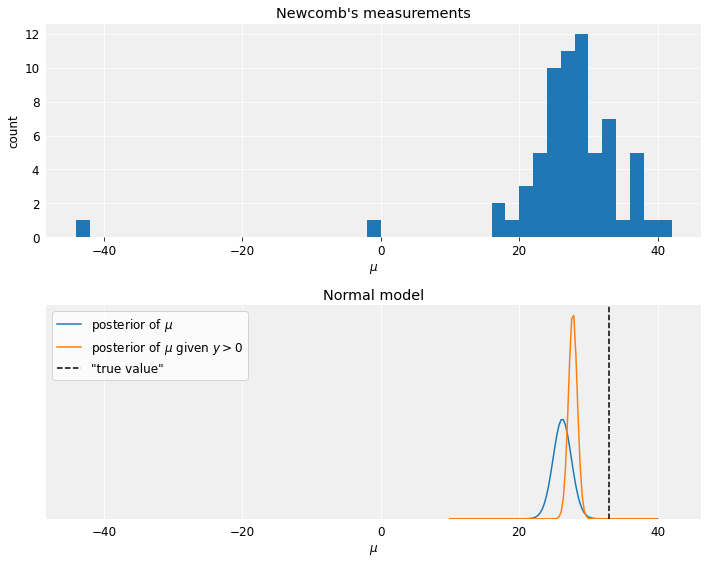

In [29]:
# Plotting

# create figure
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(10, 8))

# plot histogram
ax = axes[0]
ax.hist(y, np.arange(-44, 43, 2))
# decorate
ax.set_title("Newcomb's measurements")
ax.set_ylabel("count")
ax.set_xlabel("$\mu$")
ax.tick_params(axis="x", reset=True, top=False)

# plot the posterior of mu
ax = axes[1]
ax.plot(t1, pm_mu)
# plot the posterior of mu in the filtered case
ax.plot(t1, pm_mu_pos)
# Plot the currently accepted true value
ax.axvline(33, color="k", linestyle="--")
ax.legend(
    ("posterior of $\mu$", "posterior of $\mu$ given $y > 0$", '"true value"'),
    loc="upper left",
)
ax.set_title("Normal model")
ax.set_xlabel("$\mu$")
ax.set_yticks(())
# set bottom to zero
ax.set_ylim((0, ax.set_ylim()[1]))

fig.tight_layout()